In [1]:
import tensorflow as tf
from tensorflow import keras
print("%s version: %s" % ('tensorflow', tf.__version__))
print("%s version: %s" % ('keras', keras.__version__))

tensorflow version: 2.18.1
keras version: 3.10.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


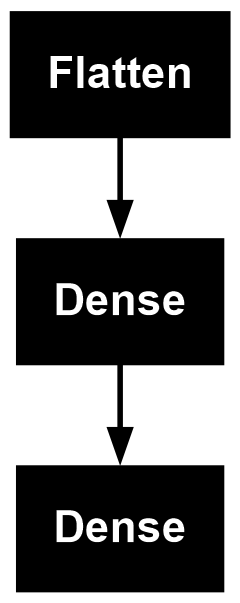

In [6]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation = 'relu'))
# model.add(keras.layers.Dense(100, activation = 'relu'))
# model.add(keras.layers.Dense(10, activation = 'softmax'))

model = keras.models.Sequential([
    tf.keras.Input(shape=(28, 28)), # <--- Explicit Input layer
    keras.layers.Flatten(),               # No input_shape needed here anymore
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
print(model.summary())
keras.utils.plot_model(model)

In [20]:
print(model.layers)
hidden0 = model.layers[0]
hidden1 = model.layers[1]
hidden2 = model.layers[2]

print("hidden0", hidden0.name)
print("hidden0 is %s" % hidden0, model.get_layer('flatten_1') is hidden0)
print("\nhidden1", hidden1.name)
print("hidden1 is %s" % hidden1, model.get_layer('dense') is hidden1)
print("\nhidden2", hidden2.name)
print("hidden2 is %s" % hidden2, model.get_layer('dense_1') is hidden2)

[<Flatten name=flatten_1, built=True>, <Dense name=dense, built=True>, <Dense name=dense_1, built=True>]
hidden0 flatten_1
hidden0 is <Flatten name=flatten_1, built=True> True

hidden1 dense
hidden1 is <Dense name=dense, built=True> True

hidden2 dense_1
hidden2 is <Dense name=dense_1, built=True> True


In [22]:
# weight0, biases0 = hidden0.get_weights()
# print("weight: ", weights0, "\n weights0 shape:", weights0.shape)
# print("biases: ", biases0)
weights1, biases1 = hidden1.get_weights()
print("weight: ", weights1, "\n weights1 shape:", weights1.shape)
print("biases: ", biases1)
weights2, biases2 = hidden2.get_weights()
print("weight: ", weights2, "\n weights2 shape:", weights2.shape)
print("biases: ", biases2)

weight:  [[-0.01213198 -0.07537296 -0.07971816 ...  0.0126228  -0.01228093
   0.01344275]
 [-0.01087207 -0.06247928 -0.07888854 ... -0.07512061 -0.00220457
   0.02145814]
 [ 0.05538834 -0.06738962  0.07341564 ...  0.068623    0.02587507
   0.02138027]
 ...
 [-0.0309027   0.00747596 -0.0335394  ...  0.01866157  0.02741061
   0.06414577]
 [ 0.01212262 -0.01580643 -0.06674127 ...  0.04476633  0.05723556
  -0.07464249]
 [ 0.0013367   0.03700946 -0.04306951 ...  0.06468417  0.02211874
  -0.06312456]] 
 weights1 shape: (784, 128)
biases:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
weight:  [[ 1.39116064e-01 -2.01216787e-02  1.25959113e-01 ...  1.0082

In [23]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6645 - loss: 1.0559 - val_accuracy: 0.8104 - val_loss: 0.5679
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8157 - loss: 0.5441 - val_accuracy: 0.8356 - val_loss: 0.4924
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8326 - loss: 0.4839 - val_accuracy: 0.8426 - val_loss: 0.4609
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8404 - loss: 0.4573 - val_accuracy: 0.8468 - val_loss: 0.4463
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8469 - loss: 0.4395 - val_accuracy: 0.8500 - val_loss: 0.4444
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8516 - loss: 0.4251 - val_accuracy: 0.8556 - val_loss: 0.4378
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8576 - loss: 0.4108 - val_accuracy: 0.8614 - val_loss: 0.4100
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8610 - loss: 0.3968 - 

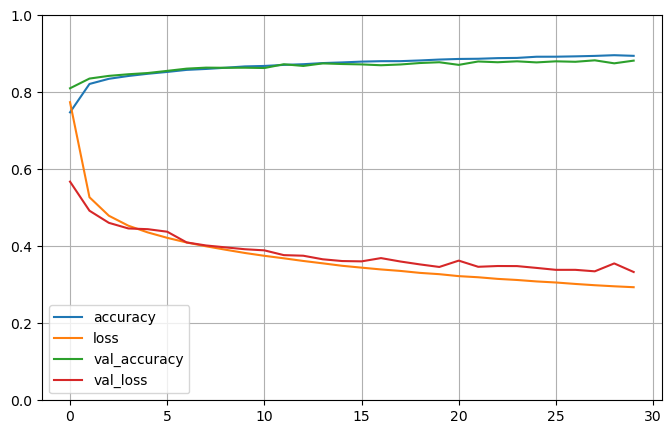

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)    # set the vertical range to [0 - 1]
plt.show()

In [ ]:
import numpy as np

# X_test prediction
print("X_test prediction", model.evaluate(X_test, y_test))

X_new = X_test[:3]
y_proba = model.predict(X_new)
print("y_proba round", y_proba.round(2))

# y_pred = model.predict_classes(X_new)
# print("y_pred", y_pred)
y_proba = model.predict(X_new)
y_pred_classes = np.argmax(y_proba, axis=1) 
print("pred classes", y_pred_classes)
# np.array(class_names)[y_pred]

y_new = y_test[:3]
print("y_new", y_new)



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


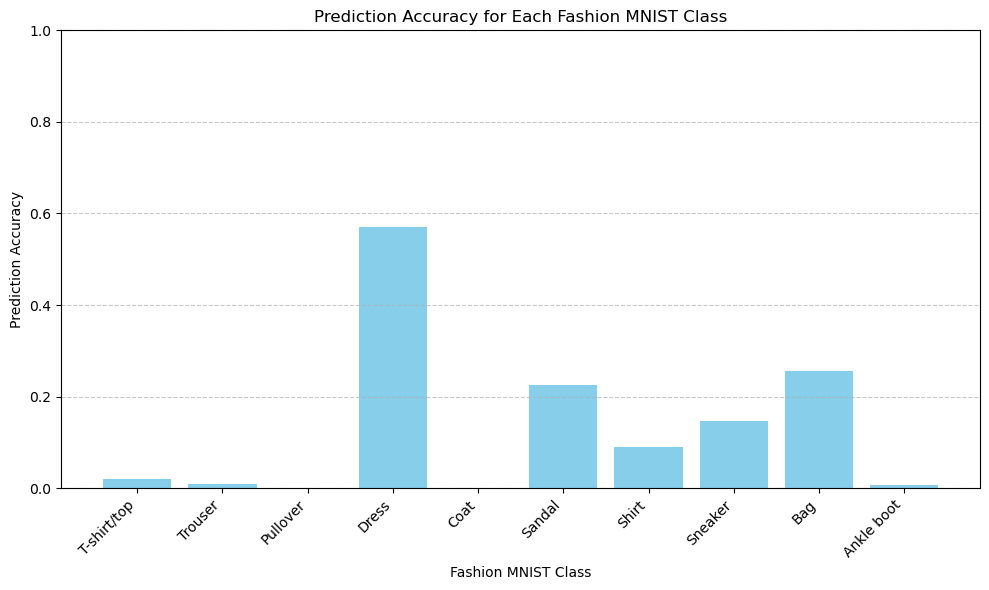


Accuracy for each class:
- T-shirt/top: 0.02
- Trouser: 0.01
- Pullover: 0.00
- Dress: 0.57
- Coat: 0.00
- Sandal: 0.23
- Shirt: 0.09
- Sneaker: 0.15
- Bag: 0.26
- Ankle boot: 0.01


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Already imported, but good for clarity

# --- 1. Load the Fashion MNIST dataset (if you haven't already loaded X_test, y_test) ---
# Assuming you loaded it like this for X_train, y_train, X_valid, y_valid
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Preprocess X_test (normalize pixel values to 0-1 range)
# Important: Ensure X_test is normalized the same way X_train was.
X_test = X_test / 255.0

# Define the class names for Fashion MNIST (useful for plotting labels)
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# --- 2. Recreate your trained model structure (assuming you have your 'model' variable from previous steps) ---
# If your model variable is still in memory from training, you can skip this re-definition.
# This is just to ensure the code is runnable standalone for demonstration.
model = keras.models.Sequential([
    tf.keras.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# NOTE: For this prediction to be meaningful, your 'model' variable MUST be the trained model.
# If you just re-defined it above, you need to load its weights or re-train it.
# For example, if you saved your trained model:
# model = keras.models.load_model('my_fashion_mnist_model.h5')
# Or, if you ran model.fit() in the same session, your 'model' variable is already trained.


# --- 3. Make predictions on the test data ---
# model.predict returns probabilities for each class
y_pred_probs = model.predict(X_test)

# Convert probabilities to actual class predictions (the class with the highest probability)
y_pred_classes = np.argmax(y_pred_probs, axis=1) # argmax finds the index of the max value along axis 1 (the class dimension)

# --- 4. Calculate accuracy for each class ---
class_accuracies = {}
for i, name in enumerate(class_names):
    # Get indices where the true label is the current class 'i'
    indices_for_class_i = np.where(y_test == i)[0]

    # Get the true labels and predicted labels for only this class
    true_labels_for_class_i = y_test[indices_for_class_i]
    predicted_labels_for_class_i = y_pred_classes[indices_for_class_i]

    # Calculate how many predictions for this class were correct
    correct_predictions = np.sum(true_labels_for_class_i == predicted_labels_for_class_i)

    # Calculate total samples for this class
    total_samples_for_class_i = len(indices_for_class_i)

    # Avoid division by zero if a class has no samples (unlikely for Fashion MNIST)
    accuracy = correct_predictions / total_samples_for_class_i if total_samples_for_class_i > 0 else 0
    class_accuracies[name] = accuracy

# --- 5. Plot the results ---
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
plt.bar(class_accuracies.keys(), class_accuracies.values(), color='skyblue')

plt.xlabel("Fashion MNIST Class")
plt.ylabel("Prediction Accuracy")
plt.title("Prediction Accuracy for Each Fashion MNIST Class")
plt.ylim(0, 1) # Accuracy always ranges from 0 to 1

# Rotate x-axis labels for better readability if names are long
plt.xticks(rotation=45, ha='right') # 'ha' for horizontal alignment

plt.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines
plt.tight_layout() # Adjust plot to prevent labels from overlapping
plt.show()

print("\nAccuracy for each class:")
for name, acc in class_accuracies.items():
    print(f"- {name}: {acc:.2f}")

Epoch 1/30
1696/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6674 - loss: 1.0497
--- Epoch 1 Per-Class Accuracies ---
  T-shirt/top: 0.7987
  Trouser: 0.9317
  Pullover: 0.6310
  Dress: 0.8822
  Coat: 0.8258
  Sandal: 0.8438
  Shirt: 0.5091
  Sneaker: 0.9219
  Bag: 0.9265
  Ankle boot: 0.8794
---------------------------------------
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6686 - loss: 1.0458 - val_accuracy: 0.8168 - val_loss: 0.5540
Epoch 2/30
1716/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8185 - loss: 0.5446
--- Epoch 2 Per-Class Accuracies ---
  T-shirt/top: 0.7877
  Trouser: 0.9514
  Pullover: 0.5575
  Dress: 0.8683
  Coat: 0.8709
  Sandal: 0.8884
  Shirt: 0.6268
  Sneaker: 0.9082
  Bag: 0.9469
  Ankle boot: 0.9249
---------------------------------------
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8186 - loss: 0.5445 - val_accuracy: 0.8348 - val_loss: 0.4934
Epoch 3/30
1688/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8359 - loss:

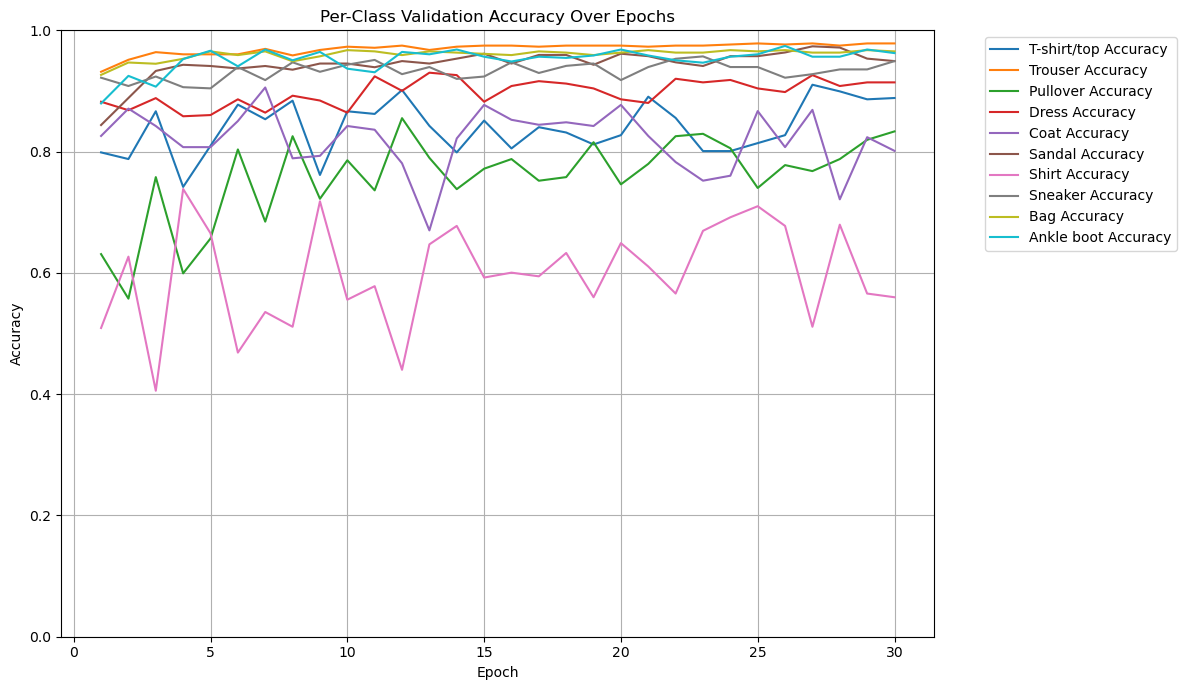

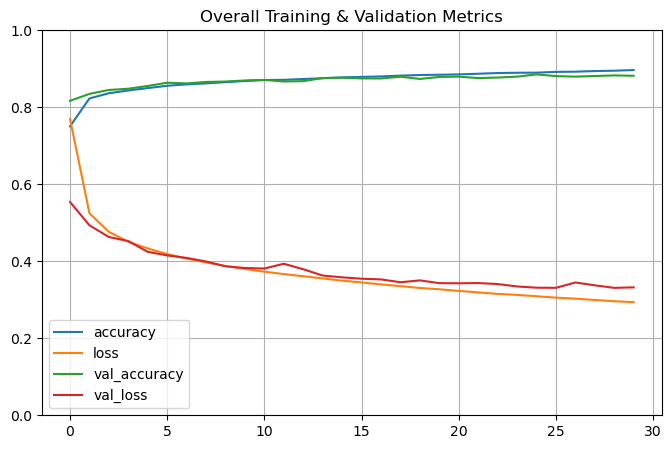

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import pandas as pd # For potential DataFrame conversion later
import seaborn as sns # For general plotting style if desired

# --- 0. Define Fashion MNIST Class Names (from previous discussion) ---
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# --- 1. Prepare your Data (Example: Load Fashion MNIST) ---
# Assuming you already have X_train, y_train, X_valid, y_valid preprocessed
# If not, here's how you might load and preprocess it:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Create a validation set from the full training set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# --- 2. Define your Keras Model (as before) ---
model = models.Sequential([
    tf.keras.Input(shape=(28, 28), name='input_layer'),
    layers.Flatten(name='flatten_layer'),
    layers.Dense(128, activation='relu', name='hidden_dense_layer'),
    layers.Dense(10, activation='softmax', name='output_dense_layer')
])

# --- 3. Compile your Model (as before) ---
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# --- 4. Create a Custom Keras Callback to Track Per-Class Accuracy ---
class PerClassAccuracyCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data, class_names):
        super().__init__()
        self.X_val, self.y_val = validation_data
        self.class_names = class_names
        self.per_class_accuracy_history = [] # To store per-class accuracies for each epoch

    def on_epoch_end(self, epoch, logs=None):
        # Predict on validation data
        y_pred_probs = self.model.predict(self.X_val, verbose=0) # verbose=0 to avoid too much output
        y_pred_classes = np.argmax(y_pred_probs, axis=1)

        # Compute Confusion Matrix
        cm = confusion_matrix(self.y_val, y_pred_classes)

        # Normalize the confusion matrix by rows to get recall (accuracy per true class)
        # Handle cases where a class might have 0 true samples in the validation set to avoid division by zero
        row_sums = cm.sum(axis=1)
        cm_normalized = np.where(row_sums[:, np.newaxis] == 0, 0, cm.astype('float') / row_sums[:, np.newaxis])

        # The diagonal elements are the per-class accuracies (recall)
        per_class_acc = cm_normalized.diagonal()
        self.per_class_accuracy_history.append(per_class_acc)

        # Optional: print per-class accuracy for the current epoch
        print(f"\n--- Epoch {epoch+1} Per-Class Accuracies ---")
        for i, acc in enumerate(per_class_acc):
            print(f"  {self.class_names[i]}: {acc:.4f}")
        print("---------------------------------------")


# --- 5. Instantiate the Callback ---
per_class_acc_callback = PerClassAccuracyCallback(
    validation_data=(X_valid, y_valid),
    class_names=class_names
)

# --- 6. Train the Model with the Callback ---
history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[per_class_acc_callback] # Pass your custom callback here
)

# --- 7. Plot the Per-Class Accuracy History ---
# Convert the list of arrays into a NumPy array for easier plotting
per_class_accuracy_data = np.array(per_class_acc_callback.per_class_accuracy_history)

plt.figure(figsize=(12, 7))
for i, class_name in enumerate(class_names):
    plt.plot(range(1, 31), per_class_accuracy_data[:, i], label=f'{class_name} Accuracy')

plt.title('Per-Class Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Accuracy ranges from 0 to 1
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside the plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Optional: Plot the overall accuracy and loss from history as well
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('Overall Training & Validation Metrics')
plt.show()


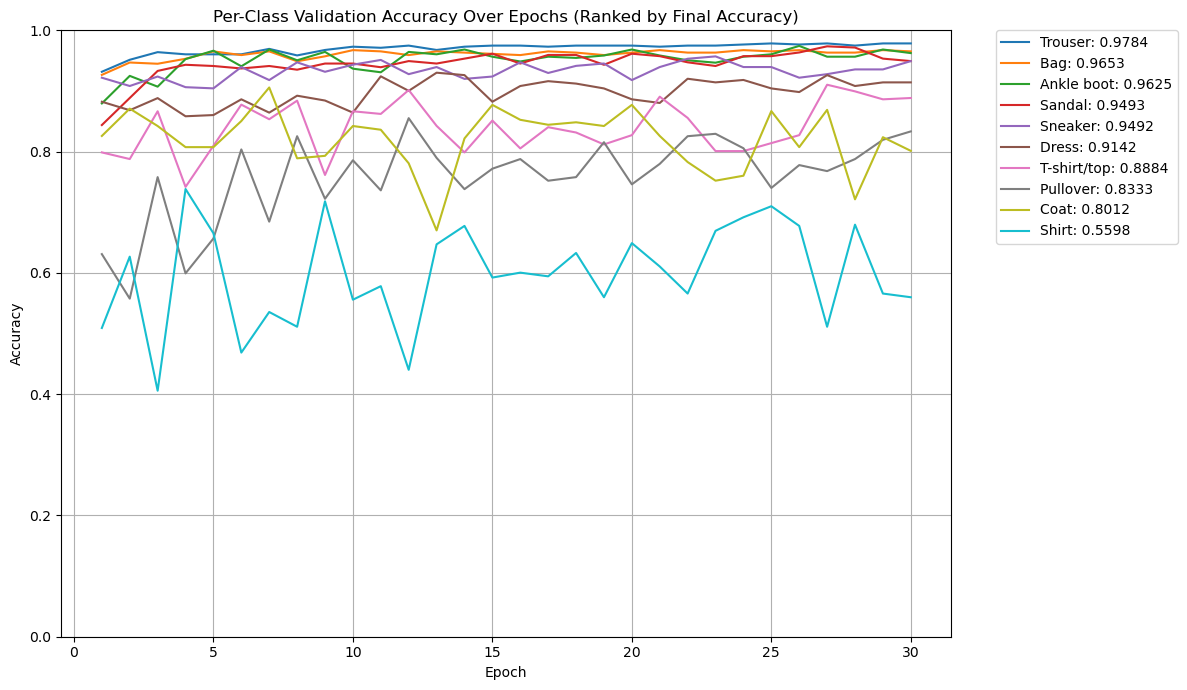


--- Final Per-Class Accuracies (Ranked) ---
Trouser: 0.9784
Bag: 0.9653
Ankle boot: 0.9625
Sandal: 0.9493
Sneaker: 0.9492
Dress: 0.9142
T-shirt/top: 0.8884
Pullover: 0.8333
Coat: 0.8012
Shirt: 0.5598


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Just in case for the overall plot, or future use

# --- Assuming these variables are still in your Jupyter session from the previous run: ---
# 1. per_class_acc_callback (the instance of your PerClassAccuracyCallback)
# 2. class_names (the list of Fashion MNIST class names)
# 3. history (the history object from model.fit(), for overall plot if needed)

# --- Ensure class_names is correctly defined if not already in your session ---
# (You might want to run this cell first if you restarted your kernel or are unsure)
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Get the raw per-class accuracy data
# This assumes 'per_class_acc_callback' is still defined from your previous execution
if 'per_class_acc_callback' not in locals():
    print("Error: 'per_class_acc_callback' not found. Please ensure the training code with the callback was run first.")
else:
    per_class_accuracy_data = np.array(per_class_acc_callback.per_class_accuracy_history)

    # 1. Get the accuracy values for the last epoch
    # per_class_accuracy_data.shape is (epochs, num_classes)
    final_epoch_accuracies = per_class_accuracy_data[-1, :] # Access the last row (last epoch), all columns

    # 2. Create a list of (accuracy, class_name, original_index) tuples
    # We need the original index to plot the correct data series
    class_accuracy_pairs = []
    for i, class_name in enumerate(class_names):
        class_accuracy_pairs.append((final_epoch_accuracies[i], class_name, i))

    # 3. Sort the list by accuracy in descending order
    sorted_classes_by_accuracy = sorted(class_accuracy_pairs, key=lambda x: x[0], reverse=True)

    # 4. Plot the per-class accuracy history with ranked legend and values
    plt.figure(figsize=(12, 7))

    for acc_val, class_name, original_index in sorted_classes_by_accuracy:
        plt.plot(
            range(1, 31), # Assuming 30 epochs
            per_class_accuracy_data[:, original_index],
            label=f'{class_name}: {acc_val:.4f}' # Format accuracy to 4 decimal places
        )

    plt.title('Per-Class Validation Accuracy Over Epochs (Ranked by Final Accuracy)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1) # Accuracy ranges from 0 to 1
    plt.grid(True)
    # Adjust legend position to avoid overlapping with plot lines
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout() # Adjust layout to prevent elements from overlapping
    plt.show()

    # You can also print the final ranked list for easy viewing:
    print("\n--- Final Per-Class Accuracies (Ranked) ---")
    for acc, name, _ in sorted_classes_by_accuracy:
        print(f"{name}: {acc:.4f}")